# ** Fintech Use Case**

## **Project Scope**
In the project, I use LendingClub dataset to predict if an unknown loan will default or not. It is also a loan rate prediction.

**Dataset**: https://www.lendingclub.com/info/statistics.action

**About LendingClub**


1.   LendingClub(LC) is one of the biggest Public American peer-to-peer lending company. It was also the first peer-to-peer lender
2.  LendingClub(LC) directly connects investors and Borrowers. Hence, by skipping banks, investors can have higher profits and borrowers can have lower interest rate.
3.  LendingClub(LC) currently worth 1.6 Billion.
  - For investor, whether a loan will default is the key. If the loan defaults, the investor might loss Investment principal. Even though, LC has Guaranteed Terms for protection, it won't secure the Investment principal. 
  - Under the premise of loan security, another question is how to determine loan rates. A good rate should meet people's expectation, which is based on borrowers' risk and unquie condition. Hence, a good strategy is to personalize each loan product.
  - The historical data shows current charge off rate is around 8 - 10%. Obviously, there are different level of loans with various risk levels.

**The Problem**

The current problem is, although LendingClub provides basic information about a loan product, it's still difficult for investors to make an accurate prediction. Their decision always based on their own confidence. Since investors can't have direct conversations with borrowers. All the information comes from files and data.


**Goal:**
Build a machine learning model as a simple tool to help investors make investment decisions:


1.   Whether a loan will be charge off
2.   The reasonable interest rate





## **STEP 1: Load Packages and Load Data**
The dataset comes from: https://www.lendingclub.com/info/statistics.action

The following information are commonnly used to make predictions:
*   Borrower's personal infromation (job, housing, income, address)
*   Borrower's financial inforamtion (dti, first credict, inquiry in 6 month, Monthly payment)
*   Purpose for loan
*   Loan infroamtion (loan amount, interest rate)
*   Repayment information(3 years/5 years, installment amount)
*   Loan status
*   The final repay amount (principle, interest)










In [0]:
#Import packages
import pandas as pd
import numpy as np

from tabulate import tabulate


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Input data
from google.colab import files
uploaded = files.upload()
# LoanData is a relatively small dataset, and I use it for a quick preview
LoanTrain = pd.read_csv('LoanData.csv')
LoanTrain.head()

Saving LoanData.csv to LoanData.csv


,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,policy_code,loan_status
0,1077501,5000,5000,36 months,10.65,162.87,B,B2,10+ years,3,24000.0,3,27.65,0,31048,1,NaN,NaN,3,0,13648,83.7,9,0.0,0.0,1,2
1,1077430,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,3,30000.0,2,1.00,0,36251,5,NaN,NaN,3,0,1687,9.4,4,0.0,0.0,1,1
2,1077175,2400,2400,36 months,15.96,84.33,C,C5,10+ years,3,12252.0,1,8.72,0,37196,2,NaN,NaN,2,0,2956,98.5,10,0.0,0.0,1,2
3,1076863,10000,10000,36 months,13.49,339.31,C,C1,10+ years,3,49200.0,2,20.00,0,35096,1,35.0,NaN,10,0,5598,21.0,37,0.0,0.0,1,2
4,1075269,5000,5000,36 months,7.90,156.46,A,A4,3 years,3,36000.0,2,11.20,0,38292,3,NaN,NaN,9,0,7963,28.3,12,0.0,0.0,1,2


## **STEP 2: Data Exploration**

### 2.1 Check duplication

In [3]:
if LoanTrain.set_index('id').index.duplicated().sum()==0:
  print('No duplicated loan')

No duplicated loan


### 2.2 Check Data Type

In [4]:
LoanTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7189 entries, 0 to 7188
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7189 non-null   int64  
 1   loan_amnt               7189 non-null   int64  
 2   funded_amnt             7189 non-null   int64  
 3   term                    7189 non-null   object 
 4   int_rate                7189 non-null   float64
 5   installment             7189 non-null   float64
 6   grade                   7189 non-null   object 
 7   sub_grade               7189 non-null   object 
 8   emp_length              6930 non-null   object 
 9   home_ownership          7189 non-null   int64  
 10  annual_inc              7189 non-null   float64
 11  verification_status     7189 non-null   int64  
 12  dti                     7189 non-null   float64
 13  delinq_2yrs             7189 non-null   int64  
 14  earliest_cr_line        7189 non-null   

There are 26 columns and some of them involves missing data: "emp_length","mths_since_last_delinq", and "mths_since_last_record".

In [5]:
# Check the numerical data
LoanTrain.describe()

,id,loan_amnt,funded_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,policy_code,loan_status
count,7.189000e+03,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,7.189000e+03,7189.000000,7189.000000,7189.000000,7189.000000,7189.000000,2284.000000,311.000000,7189.000000,7189.000000,7189.000000,7186.000000,7189.000000,7189.000000,7189.000000,7189.0,7189.000000
mean,9.909258e+05,12334.869245,12248.362081,12.209183,361.450204,2.038392,6.922274e+04,2.053832,13.959409,0.126582,35692.106134,0.854083,37.730736,95.122186,9.447767,0.043678,13723.021422,53.305694,22.371679,1.722750,1.720520,1.0,1.828210
std,6.363214e+04,8236.030533,8123.625907,4.218946,227.608785,0.960648,5.010670e+04,0.831035,6.583379,0.441454,2508.383129,1.028390,21.324592,19.604588,4.220542,0.206423,14540.806091,27.530058,11.030721,103.339903,103.205776,0.0,0.377224
min,4.581650e+05,1000.000000,1000.000000,5.420000,30.440000,1.000000,6.000000e+03,1.000000,0.000000,0.000000,19998.000000,0.000000,1.000000,21.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.0,1.000000
25%,9.702260e+05,6000.000000,6000.000000,7.900000,190.520000,1.000000,4.200000e+04,1.000000,8.930000,0.000000,34486.000000,0.000000,20.000000,89.000000,6.000000,0.000000,4923.000000,31.400000,14.000000,0.000000,0.000000,1.0,2.000000
50%,1.006590e+06,10000.000000,10000.000000,11.990000,317.710000,2.000000,6.000000e+04,2.000000,14.000000,0.000000,36161.000000,1.000000,36.000000,99.000000,9.000000,0.000000,10177.000000,56.000000,21.000000,0.000000,0.000000,1.0,2.000000
75%,1.039671e+06,16000.000000,16000.000000,15.270000,472.360000,3.000000,8.235000e+04,3.000000,19.100000,0.000000,37377.000000,1.000000,53.000000,109.000000,12.000000,0.000000,17564.000000,75.900000,29.000000,0.000000,0.000000,1.0,2.000000
max,1.077501e+06,35000.000000,35000.000000,24.110000,1283.500000,3.000000,1.782000e+06,3.000000,29.920000,6.000000,39753.000000,8.000000,86.000000,119.000000,34.000000,2.000000,148804.000000,99.900000,79.000000,6405.390000,6396.450000,1.0,2.000000


### 2.3 Fill Null Values & Drop

In [0]:
# use interpolate() function to fill NA values in the dataframe
Clean = LoanTrain.select_dtypes(include=[np.number]).interpolate().dropna()

yPredict = Clean.loan_status
XClean = Clean.drop(["loan_status"], axis=1)

### 2.4 Feature Importance by Random Forest

Since there are over 20 features, I'm going to run a random forest regression first to find the most important ones.

In [0]:
# Setup Traning & Test Data
X_train, X_test, y_train, y_test = train_test_split(XClean, yPredict, random_state=42, test_size=.33)
# Random Forest
clf = RandomForestRegressor(n_jobs=2, n_estimators=1000)
model = clf.fit(X_train, y_train)

In [9]:
# Find Feature Importance, descending order
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name                          score
int_rate                0.113922
dti                     0.0787446
mths_since_last_record  0.0785499
annual_inc              0.078396
id                      0.0781095
earliest_cr_line        0.076052
revol_bal               0.07565
mths_since_last_delinq  0.0756475
revol_util              0.0752485
installment             0.0558172
total_acc               0.05398
open_acc                0.0414319
funded_amnt             0.0309502
loan_amnt               0.0306209
inq_last_6mths          0.0199183
verification_status     0.0126932
home_ownership          0.0108877
pub_rec                 0.00678927
delinq_2yrs             0.0064587
out_prncp               7.10929e-05
out_prncp_inv           6.15732e-05
policy_code             0


Even though "id" has a higher score, from the common,it doesn't have meanings. However, it might have some correlation with the person's characteristics in natural. For example, smaller id mean the person open the account/loan earlier, which might mean he/she has more financial sense or more technical.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


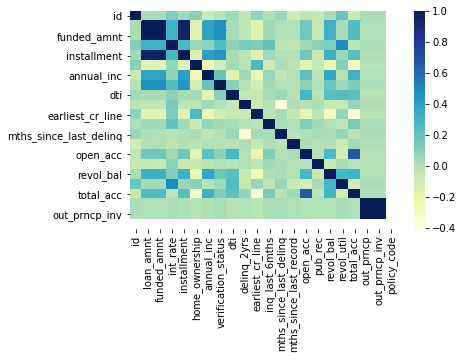

In [10]:
import seaborn as sns
corr = X_train.corr()
sns.heatmap(corr, cmap="YlGnBu")

There existing some features that have high correlation with each other.

## **STEP 3: Import & Preprocess Offical Dataset**

Now, I've have some basic idea about the dataset features. I'm going to use the offcial dataset to build the model.

In [11]:
uploaded = files.upload()
#  upload the offical dataset
Loan = pd.read_csv('LoanOffical.csv')
Loan.head()

Saving LoanOffical.csv to LoanOffical.csv


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,31048,1,3,0,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,30000.0,Source Verified,car,GA,1.00,36251,5,3,0,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,43040,2,2,0,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,35096,1,10,0,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,43043,3,9,0,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


In [12]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9004 non-null   int64  
 1   loan_amnt            9004 non-null   int64  
 2   funded_amnt          9004 non-null   int64  
 3   funded_amnt_inv      9004 non-null   float64
 4   term                 9004 non-null   object 
 5   int_rate             9004 non-null   float64
 6   installment          9004 non-null   float64
 7   grade                9004 non-null   object 
 8   emp_length           8688 non-null   object 
 9   home_ownership       9004 non-null   object 
 10  annual_inc           9004 non-null   float64
 11  verification_status  9004 non-null   object 
 12  purpose              9004 non-null   object 
 13  addr_state           9004 non-null   object 
 14  dti                  9004 non-null   float64
 15  earliest_cr_line     9004 non-null   i

### 3.1 Class Mapping

Since l'm intend to run a nerual Network model, l need to class map all the categorical data.

In [0]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(Loan['term']))}
Loan['term']=Loan['term'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Loan['grade']))}
Loan['grade']=Loan['grade'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Loan['home_ownership']))}
Loan['home_ownership']=Loan['home_ownership'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Loan['verification_status']))}
Loan['verification_status']=Loan['verification_status'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Loan['purpose']))}
Loan['purpose']=Loan['purpose'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Loan['addr_state']))}
Loan['addr_state']=Loan['addr_state'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Loan['loan_status']))}
Loan['loan_status']=Loan['loan_status'].map(class_mapping)

In [15]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9004 non-null   int64  
 1   loan_amnt            9004 non-null   int64  
 2   funded_amnt          9004 non-null   int64  
 3   funded_amnt_inv      9004 non-null   float64
 4   term                 9004 non-null   int64  
 5   int_rate             9004 non-null   float64
 6   installment          9004 non-null   float64
 7   grade                9004 non-null   int64  
 8   emp_length           8688 non-null   object 
 9   home_ownership       9004 non-null   int64  
 10  annual_inc           9004 non-null   float64
 11  verification_status  9004 non-null   int64  
 12  purpose              9004 non-null   int64  
 13  addr_state           9004 non-null   int64  
 14  dti                  9004 non-null   float64
 15  earliest_cr_line     9004 non-null   i

### 3.2 Drop Non-excante Data

In [0]:
Loan = Loan.select_dtypes(include=[np.number]).interpolate().dropna()
Loan = Loan.drop(["total_pymnt","total_pymnt_inv","total_rec_int"],axis=1)

By doing this step, l drop three non-excante data column to make the prediciton more reasonable since there is impossible to have "total_pymnt","total_pymnt_inv","total_rec_int" information ahead.

Also, the "emp_length" is dropped since it contains null value. For the project purpose, l dropped it. However, if l want to have this column involved, I could change all the string value to numeric value by have a key:value dictionary map. Then, fill the missing value using interpolate() function.

## **STEP 4: Model Training**

### 4.1 Train & Test Split

In [0]:
# Split dependent & independent variable 

yPredict = Loan.loan_status
XClean = Loan.drop(["loan_status"], axis=1)

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(XClean, yPredict, random_state=42, test_size=.30)

### 4.2 Feature Scaling 

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 4.3 Netual Network Model - Classification(sklean)

By using the classification model, l will get the prediction of y in either 0,1 value, which means a loan product will charge off or not.

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## **STEP 5: Prediction & Evaluation**

### 5.1 Model Prediction

In [56]:
# use model to make predictions on test data set
predictions = mlp.predict(X_test)
print(predictions)

[1 0 1 ... 0 0 1]


### 5.2 Model Evaluation

In [58]:
# use confusion matrix to make evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 443   13]
 [   2 2244]]


In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       456
           1       0.99      1.00      1.00      2246

    accuracy                           0.99      2702
   macro avg       0.99      0.99      0.99      2702
weighted avg       0.99      0.99      0.99      2702



From the classification report, the model perform really well. 

Precision expresses the proportion of the data points the model says was relevant actually were relevant.

Recall expresses the ability to find all relevant instances in a dataset.

For our model, all the precision and recall scores are 95% in both 0 and 1 result.


## **STEP 6: Other Insights: Interest rate Prediction**

Since the goals are to determine "Whether a loan will be charge off" and find "The reasonable interest rate", in this step, l will have similar process but different model to find the interest rate.

In [61]:
uploaded = files.upload()
#  upload the offical dataset
Interest = pd.read_csv('LoanOffical.csv')
Interest.head()

Saving LoanOffical.csv to LoanOffical (2).csv


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,31048,1,3,0,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,30000.0,Source Verified,car,GA,1.00,36251,5,3,0,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,43040,2,2,0,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,35096,1,10,0,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,43043,3,9,0,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


In [0]:
# Class mapping
class_mapping = {label:idx for idx, label in enumerate(np.unique(Interest['term']))}
Interest['term']=Interest['term'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Interest['grade']))}
Interest['grade']=Interest['grade'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Interest['home_ownership']))}
Interest['home_ownership']=Interest['home_ownership'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Interest['verification_status']))}
Interest['verification_status']=Interest['verification_status'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Interest['purpose']))}
Interest['purpose']=Interest['purpose'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Interest['addr_state']))}
Interest['addr_state']=Interest['addr_state'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Interest['loan_status']))}
Interest['loan_status']=Interest['loan_status'].map(class_mapping)

In [0]:
# drop non-excante
Interest = Interest.select_dtypes(include=[np.number]).interpolate().dropna()
Interest = Interest.drop(["total_pymnt","total_pymnt_inv","total_rec_int","loan_status"],axis=1)

In [64]:
Interest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9004 entries, 0 to 9003
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9004 non-null   int64  
 1   loan_amnt            9004 non-null   int64  
 2   funded_amnt          9004 non-null   int64  
 3   funded_amnt_inv      9004 non-null   float64
 4   term                 9004 non-null   int64  
 5   int_rate             9004 non-null   float64
 6   installment          9004 non-null   float64
 7   grade                9004 non-null   int64  
 8   home_ownership       9004 non-null   int64  
 9   annual_inc           9004 non-null   float64
 10  verification_status  9004 non-null   int64  
 11  purpose              9004 non-null   int64  
 12  addr_state           9004 non-null   int64  
 13  dti                  9004 non-null   float64
 14  earliest_cr_line     9004 non-null   int64  
 15  inq_last_6mths       9004 non-null   i

In [97]:
Interest.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_rec_prncp
count,9.004000e+03,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9.004000e+03,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.00000,9004.000000,9004.0,9004.0,9004.000000
mean,9.632337e+05,12291.884163,12154.156486,12076.054639,0.261550,12.126728,357.478229,1.421146,1.022434,6.957693e+04,1.049534,3.287983,18.956353,13.889958,37300.462794,0.857175,9.429809,0.047423,13658.416148,52.37312,22.438583,0.0,0.0,10563.492623
std,7.953238e+04,8285.682170,8096.937145,8033.211335,0.439503,4.195740,227.180439,1.369484,0.961174,4.885841e+04,0.828777,2.918651,12.727502,6.609968,4379.652217,1.043980,4.263802,0.215667,15038.825421,27.64150,11.146531,0.0,0.0,7946.456673
min,4.581650e+05,1000.000000,1000.000000,750.000000,0.000000,5.420000,30.160000,0.000000,0.000000,6.000000e+03,0.000000,0.000000,0.000000,0.000000,19998.000000,0.000000,2.000000,0.000000,0.000000,0.00000,3.000000,0.0,0.0,0.000000
25%,8.778840e+05,6000.000000,6000.000000,6000.000000,0.000000,8.490000,187.750000,0.000000,0.000000,4.200000e+04,0.000000,2.000000,6.000000,8.860000,34455.000000,0.000000,6.000000,0.000000,4559.750000,30.50000,14.000000,0.0,0.0,4800.000000
50%,9.879685e+05,10000.000000,10000.000000,10000.000000,0.000000,11.710000,312.910000,1.000000,1.000000,6.000000e+04,1.000000,2.000000,17.000000,13.940000,36161.000000,1.000000,9.000000,0.000000,9889.000000,54.70000,21.000000,0.0,0.0,8650.000000
75%,1.033607e+06,16000.000000,16000.000000,15975.000000,1.000000,15.230000,469.360000,2.000000,2.000000,8.300000e+04,2.000000,3.000000,29.000000,19.082500,42827.000000,1.000000,12.000000,0.000000,17468.250000,75.00000,29.000000,0.0,0.0,14500.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,1.000000,24.110000,1288.100000,6.000000,2.000000,1.782000e+06,2.000000,12.000000,44.000000,29.920000,43076.000000,8.000000,34.000000,2.000000,148804.000000,99.90000,79.000000,0.0,0.0,35000.010000


In [0]:
# Split dependent & independent variable 
yPredict = Loan.int_rate
XClean = Loan.drop(["int_rate"], axis=1)

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(XClean, yPredict, random_state=42, test_size=.30)

In [0]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# transform y from % to number
y_train=y_train*0.01
y_test=y_test*0.01

In [112]:
# Netual Network Model - Classification(sklean)
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
'''
The model expects rows of data with 24 variables (the input_dim=24 argument)
The first hidden layer has 32 nodes and uses the relu activation function.
The second hidden layer has 32 nodes and uses the relu activation function.
The output layer has one node and uses the sigmoid activation function.
'''

model_int = Sequential()

model_int.add(Dense(16, input_dim=24, activation ='relu'))
model_int.add(Dense(8, activation='relu'))
model_int.add(Dense(1, activation='sigmoid'))

model_int.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 9         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. 

The main reason to use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

In [0]:
# compile the keras model
model_int.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
# Validating our approach
x_val = X_train[:6000]
partial_x_train = X_train[6000:]

y_val = y_train[:6000]
partial_y_train = y_train[6000:]

In [120]:
history = model_int.fit(
    partial_x_train, 
    partial_y_train, 
    epochs=20, 
    batch_size=512, 
    validation_data=(x_val, y_val)
)

Train on 302 samples, validate on 6000 samples
Epoch 1/20
302/302 [==============================] - 0s 81us/step - loss: 1.6530e-06 - val_loss: 1.6354e-06
Epoch 2/20
302/302 [==============================] - 0s 49us/step - loss: 1.6530e-06 - val_loss: 1.6354e-06
Epoch 3/20
302/302 [==============================] - 0s 50us/step - loss: 1.6530e-06 - val_loss: 1.6354e-06
Epoch 4/20
302/302 [==============================] - 0s 52us/step - loss: 1.6530e-06 - val_loss: 1.6354e-06
Epoch 5/20
302/302 [==============================] - 0s 50us/step - loss: 1.6530e-06 - val_loss: 1.6354e-06
Epoch 6/20
302/302 [==============================] - 0s 50us/step - loss: 1.6530e-06 - val_loss: 1.6354e-06
Epoch 7/20
302/302 [==============================] - 0s 50us/step - loss: 1.6530e-06 - val_loss: 1.6354e-06
Epoch 8/20
302/302 [==============================] - 0s 47us/step - loss: 1.6530e-06 - val_loss: 1.6354e-06
Epoch 9/20
302/302 [==============================] - 0s 49us/step - loss: 1.6530

In [121]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'loss'])

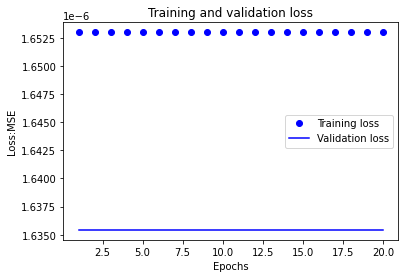

In [122]:
import matplotlib.pyplot as plt

# TODO: plot the model loss on both training and validation data. 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss:MSE')
plt.legend()

plt.show()

In [123]:
results = model_int.evaluate(X_test, y_test)
print(results)

2702/2702 [==============================] - 0s 17us/step
0.016706992913420822


I use MSE to evaluate the model performace, the smaller MSE the better performance.

This model has a pretty good prediction accurancy.

In [0]:
# Predictions
prediction = model_int.predict(X_test)